In [1]:
import os
from pathlib import Path 

In [2]:
path = Path('data')
os.listdir(path)

['extra',
 'label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'train.csv',
 'train_extra.csv',
 'train_extra_full',
 'train_images',
 'train_old.csv',
 'train_processed.csv']

In [3]:
os.listdir(path/'extra')

['extraimages', 'random.txt', 'test', 'train']

In [4]:
extra_labels = os.listdir(path/'extra'/'train')
extra_labels

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [5]:
map2labs = {
    'cbb': 0,
    'cbsd': 1,
    'cgm': 2,
    'cmd': 3, 
    'healthy': 4
}

In [6]:
for lab in extra_labels:
    imgs = os.listdir(path/'extra'/'train'/lab)
    print(lab, map2labs[lab], len(imgs))

cbb 0 466
cbsd 1 1443
cgm 2 773
cmd 3 2658
healthy 4 316


In [7]:
train = pd.read_csv(path/'train.csv')
train

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [8]:
old_imgs = [f'train_images/{img}' for img in train['image_id'].values]
old_labs = train['label'].tolist()

len(old_imgs), len(old_labs)

(21397, 21397)

In [9]:
new_imgs, new_labs = [] ,[]
for lab in extra_labels:
    imgs = os.listdir(path/'extra'/'train'/lab)
    new_imgs += [f'extra/train/{lab}/{img}' for img in imgs]
    new_labs += [map2labs[lab]]*len(imgs)
    
len(new_imgs), len(new_labs)

(5656, 5656)

In [10]:
train_extra = pd.DataFrame({
    'image_id': old_imgs + new_imgs,
    'label': old_labs + new_labs
})

train_extra

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
27048,extra/train/healthy/train-healthy-95.jpg,4
27049,extra/train/healthy/train-healthy-96.jpg,4
27050,extra/train/healthy/train-healthy-97.jpg,4
27051,extra/train/healthy/train-healthy-98.jpg,4


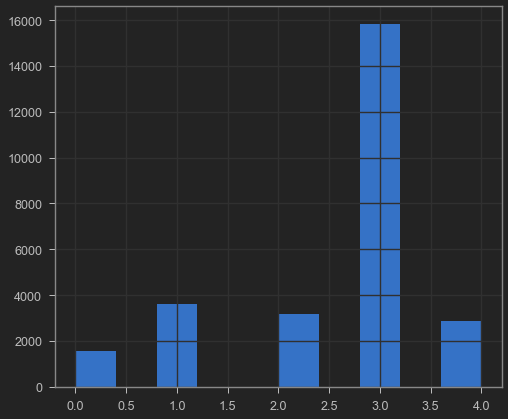

In [11]:
train_extra.label.hist()
plt.show()

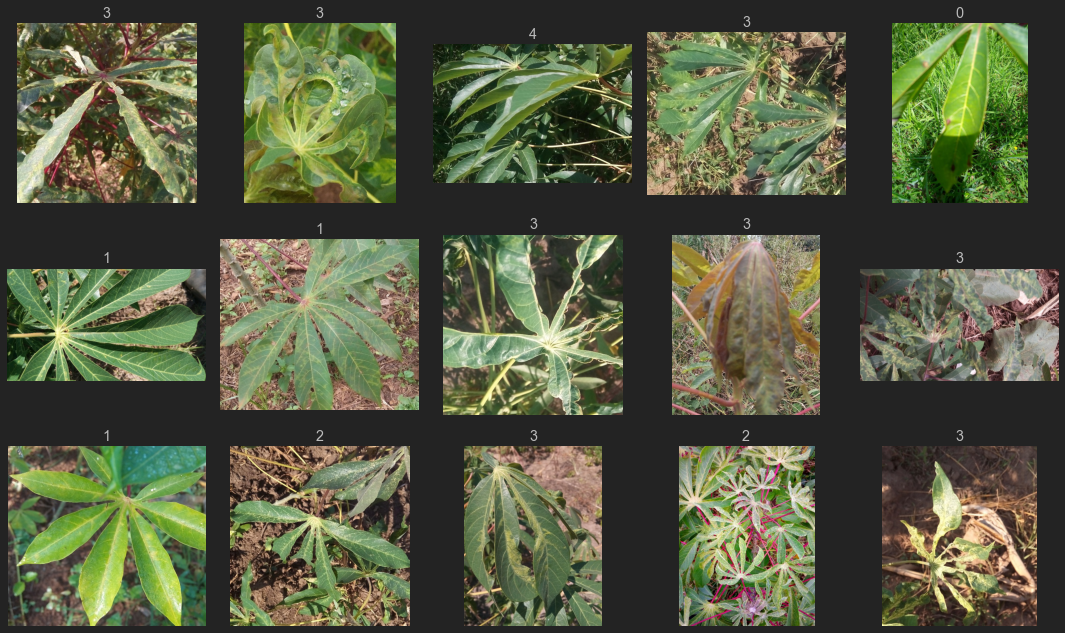

In [12]:
import random 
import torchvision

r, c = 3, 5
fig = plt.figure(figsize=(3*c, 3*r))
for _r in range(r):
    for _c in range(c):
        ax = plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(new_imgs)-1)
        img = torchvision.io.read_image(str(path/new_imgs[ix]))
        label = new_labs[ix]
        plt.axis("off")
        plt.imshow(img.permute(1,2,0))
        plt.title(label)
plt.tight_layout()
plt.show()

In [13]:
train_extra.to_csv(path/'train_extra.csv', index=False)

In [14]:
train_old = pd.DataFrame({
    'image_id': old_imgs,
    'label': old_labs
})

train_old 

,image_id,label
0,train_images/1000015157.jpg,0
1,train_images/1000201771.jpg,3
2,train_images/100042118.jpg,1
3,train_images/1000723321.jpg,1
4,train_images/1000812911.jpg,3
...,...,...
21392,train_images/999068805.jpg,3
21393,train_images/999329392.jpg,3
21394,train_images/999474432.jpg,1
21395,train_images/999616605.jpg,4


In [15]:
train_old.to_csv(path/'train_old.csv', index=False)

In [20]:
from sklearn.model_selection import train_test_split

def data_split(df, test_size=0.2, random_state=42, subset=0.1):
    train, val = train_test_split(
        df,
        test_size=test_size,
        shuffle=True,
        stratify=df['label'],
        random_state=random_state
    )
    _, subset = train_test_split(
        train,
        test_size=subset,
        shuffle=True,
        stratify=train['label'],
        random_state=random_state
    )
    return train, val, subset        

In [21]:
train, val, subset = data_split(train_old)

len(train), len(val), len(subset)

(17117, 4280, 1712)

In [22]:
train.to_csv(path/'data_old_train.csv', index=False)
val.to_csv(path/'data_old_val.csv', index=False)
subset.to_csv(path/'data_old_subset.csv', index=False)

In [23]:
train, val, subset = data_split(train_extra)

len(train), len(val), len(subset)

(21642, 5411, 2165)

In [24]:
train.to_csv(path/'data_extra_train.csv', index=False)
val.to_csv(path/'data_extra_val.csv', index=False)
subset.to_csv(path/'data_extra_subset.csv', index=False)

In [26]:
os.listdir(path)

['data_extra_subset.csv',
 'data_extra_train.csv',
 'data_extra_val.csv',
 'data_old_subset.csv',
 'data_old_train.csv',
 'data_old_val.csv',
 'extra',
 'label_num_to_disease_map.json',
 'sample_submission.csv',
 'test_images',
 'train.csv',
 'train_extra.csv',
 'train_images',
 'train_old.csv']